# MHKiT SWAN Example

This example notebook demonstrates the input and plotting of output data from the software [Simulating WAves Nearshore (SWAN)](http://swanmodel.sourceforge.net/) using MHKiT. In this example the [SNL-SWAN](https://github.com/SNL-WaterPower/SNL-SWAN) tutorial was run for a wave energy converter. The output was written in ASCII and binary (*.mat) files. This MHKiT example notebook demonstrates how to import these different files into MHKiT and plot the output data. First, we will import the MHKiT SWAN package and the other Python packages needed for this example. Secondly, we will create an operating system independent path to the folder housing the SWAN data used in this example `swan_data_folder` using the `join` funtion. 

In [1]:
from mhkit.wave.io import swan
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd

swan_data_folder = join("data", "wave", "swan")

## Supported SWAN Output Files

MHKiT currenlty supports block and table SWAN output files in ASCII or binary (*.mat) files. Detailed descriptions of these file types may be found in the [SWAN User Manual](http://swanmodel.sourceforge.net/download/zip/swanuse.pdf). In the following cells, SWAN table and block data will be imported, discussed, and plotted. Three SWAN output files will be imported:
 1. An ASCII table file ('SWANOUT.DAT'), 
 2. An ASCII block file ('SWANOUTBlock.DAT') 
 3. A binary block file ('SWANOUT.mat')  

In [2]:
swan_table_file = join(swan_data_folder, "SWANOUT.DAT")
swan_block_file = join(swan_data_folder, "SWANOUTBlock.DAT")
swan_block_mat_file = join(swan_data_folder, "SWANOUT.mat")

## Load SWAN Files with MHKiT

To load a supported SWAN file simply call the `swan.read_table` or `swan.read_block` as appropriate for the swan output. The MHKiT function will read in the SWAN output and return the data as a DataFrame for table data or a dictionary of DataFrames for block data with multiple quantities of interest written to the file. The MHKiT SWAN read function will also return any metadata that the file may contain which will vary based on the file type and options specified in the SWAN run. MHKiT requires that for block data written in ASCII format that the file was written with headers. The `swan.read_block` function accepts both binary and ASCII format by assuming that any non-'.mat' extension is ASCII format.

## SWAN Table Data and Metadata

The SWAN output table is parsed from the MHKiT funtion `swan.read_table` into a DataFrame that is displayed below. The DataFrame columns contain a series of x-points ('Xp'), y-points ('Yp'), and keyword values at a given (x,y) point. The keywords are specified in the SWAN user manual and here can be seen as: 'Hsig' (significant wave height), 'Dir' (average wave direction), 'RTpeak' (Relative peak period), 'TDir' (direction of the energy transport). 

In [3]:
swan_table, metadata_table = swan.read_table(swan_table_file)
swan_table

,Xp,Yp,Hsig,Dir,RTpeak,TDir
0,0.0,0.0,1.00106,0.000,9.5726,0.000
1,10.0,0.0,1.00106,0.000,9.5726,0.000
2,20.0,0.0,1.00106,0.000,9.5726,0.000
3,30.0,0.0,1.00106,0.000,9.5726,0.000
4,40.0,0.0,1.00106,0.000,9.5726,0.000
...,...,...,...,...,...,...
10196,960.0,1000.0,1.00091,359.990,9.5726,359.991
10197,970.0,1000.0,1.00089,359.988,9.5726,359.989
10198,980.0,1000.0,1.00086,359.986,9.5726,359.987
10199,990.0,1000.0,1.00083,359.984,9.5726,359.985


In the cell below, metadata is written to screen and can be seen to be a dictionary of keywords which contains the SWAN run name, the type of table written, the version of SWAN run, the column headers, and the associated units.

In [4]:
metadata_table

{'Run': 'TEST',
 'Table': ['COMPGRID'],
 'version': '41.20',
 'header': ['Xp', 'Yp', 'Hsig', 'Dir', 'RTpeak', 'TDir'],
 'units': ['m', 'm', 'm', 'degr', 'sec', 'degr']}

## SWAN Block (ASCII) Data and Metadata

MHKiT will read in block data as a Dictionary of DataFrames for each quantity of interest in the file. The Dictionary `swan_block` (shown below) is read using `swan.read_block` on the ASCII block data, and has the same four keys from the table data shown previously. In the cell below the DataFrame for the 'Significant wave height' is shown by accessing the Dictionary using the specified key. This DataFrame has indices and columns referring to a point on the grid and a value of significant wave height at each point. In the last code block, the metadata Dictionary is written to screen.

In [5]:
swan_block, metadata_block = swan.read_block(swan_block_file)
swan_block.keys()

dict_keys(['Significant wave height', 'Average wave direction', 'Relative peak period', 'direction of the energy transport'])

In [6]:
swan_block["Significant wave height"]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
100,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
metadata_block

{'Significant wave height': {'Run': 'TEST',
  'Frame': 'COMPGRID',
  'Unit': '0.1000E-01 m',
  'unitMultiplier': 0.01},
 'Average wave direction': {'Run': 'TEST',
  'Frame': 'COMPGRID',
  'Unit': '0.1000E+00 degr',
  'unitMultiplier': 0.1},
 'Relative peak period': {'Run': 'TEST',
  'Frame': 'COMPGRID',
  'Unit': '0.1000E+00 sec',
  'unitMultiplier': 0.1},
 'direction of the energy transport': {'Run': 'TEST',
  'Frame': 'COMPGRID',
  'Unit': '0.1000E+00 degr',
  'unitMultiplier': 0.1}}

## SWAN Block (.mat) Data and Metadata

The Block "SWANOUT.mat" file is a binary output from SWAN containing the same data as was shown for the ASCII block file above. The Dictionary `swan_block_mat` (shown below) is read using `swan.read_block` on the binary block data, and has the same four keys from the Table data shown previously. Looking at the first code block below it can be seen that the returned Dictionary keys are the SWAN variable names ('Hsig', 'Dir', 'RTpeak', 'TDir'). Looking at the DataFrame for the significant wave height ('Hsig') we can see that the indices and columns are the same as the previous block ASCII DataFrame but the values now contain six decimal places. One consideration for working with binary data is shown in the last cell block of the section where there is no metadata letting the user know the units of the data. For binary data, the user would need to check the run's SWAN input file.

In [8]:
swan_block_mat, metadata_block_mat = swan.read_block(swan_block_mat_file)
swan_block_mat.keys()

dict_keys(['Hsig', 'Dir', 'RTpeak', 'TDir'])

In [9]:
swan_block_mat["Hsig"]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.001056,1.001056,1.001055,1.001055,1.001055,1.001055,1.001054,1.001054,1.001054,1.001053,...,1.000756,1.000708,1.000654,1.000595,1.000529,1.000456,1.000376,1.000289,1.000195,1.000088
1,1.001056,1.001055,1.001055,1.001054,1.001054,1.001054,1.001053,1.001053,1.001052,1.001052,...,1.000698,1.000641,1.000579,1.000509,1.000432,1.000348,1.000256,1.000156,1.000047,0.999916
2,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000615,1.000548,1.000473,1.000390,1.000299,1.000200,1.000092,0.999976,0.999850,0.999699
3,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000515,1.000434,1.000345,1.000247,1.000140,1.000023,0.999897,0.999762,0.999616,0.999444
4,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001050,...,1.000392,1.000295,1.000189,1.000073,0.999947,0.999811,0.999665,0.999508,0.999340,0.999143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001050,...,1.000917,1.000893,1.000865,1.000833,1.000795,1.000752,1.000703,1.000648,1.000586,1.000506
97,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000941,1.000921,1.000899,1.000872,1.000841,1.000806,1.000765,1.000720,1.000668,1.000599
98,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001052,1.001052,1.001051,1.001051,...,1.000960,1.000945,1.000926,1.000905,1.000879,1.000850,1.000817,1.000779,1.000735,1.000678
99,1.001056,1.001055,1.001055,1.001054,1.001054,1.001053,1.001053,1.001052,1.001052,1.001052,...,1.000976,1.000964,1.000949,1.000931,1.000911,1.000887,1.000859,1.000827,1.000791,1.000743


In [10]:
metadata_block_mat

{'filetype': 'mat', 'variables': ['Hsig', 'Dir', 'RTpeak', 'TDir']}

## Block to Table

MHKiT provides functionality to convert SWAN block Dictionaries to table DataFrame format. This provides the user with the ability to easily process and manipulate data across multiple data types. The function converts each key to a column in a single DataFrame.

In [11]:
swan_block_as_table = swan.dictionary_of_block_to_table(swan_block)
swan_block_mat_as_table = swan.dictionary_of_block_to_table(swan_block_mat)
swan_block_as_table

,x,y,Significant wave height,Average wave direction,Relative peak period,direction of the energy transport
100,0,0,1.0,0.0,9.6,0.0
99,0,1,1.0,0.0,9.6,0.0
98,0,2,1.0,0.0,9.6,0.0
97,0,3,1.0,0.0,9.6,0.0
96,0,4,1.0,0.0,9.6,0.0
...,...,...,...,...,...,...
10104,100,96,1.0,NaN,9.6,NaN
10103,100,97,1.0,NaN,9.6,NaN
10102,100,98,1.0,NaN,9.6,NaN
10101,100,99,1.0,NaN,9.6,NaN


## Example Plots from SWAN Data

This last section shows a couple of plots for the significant wave height using each of the imported results.

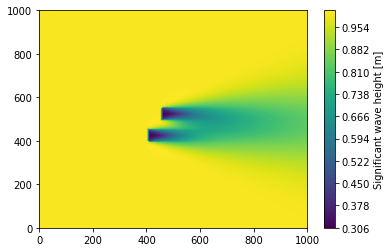

In [12]:
plt.figure()
plt.tricontourf(swan_table.Xp, swan_table.Yp, swan_table.Hsig, levels=256)
cbar = plt.colorbar()
cbar.set_label("Significant wave height [m]")

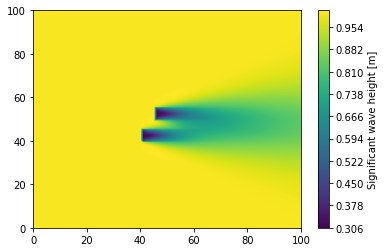

In [13]:
plt.figure()
plt.tricontourf(
    swan_block_mat_as_table.x,
    swan_block_mat_as_table.y,
    swan_block_mat_as_table.Hsig,
    levels=256,
    cmap="viridis",
)
cbar = plt.colorbar()
cbar.set_label("Significant wave height [m]")

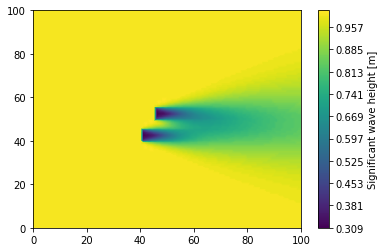

In [14]:
plt.figure()
plt.tricontourf(
    swan_block_as_table.x,
    swan_block_as_table.y,
    swan_block_as_table["Significant wave height"],
    levels=256,
    cmap="viridis",
)
cbar = plt.colorbar()
cbar.set_label("Significant wave height [m]")

## Plot Block Data

Lastly significant wave height is plotted from the block data using `imshow` with a reversed y-axis to show the same plot achieved above.

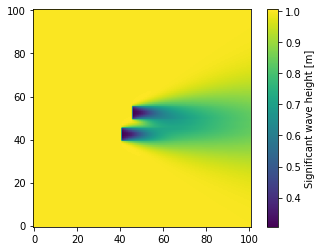

In [15]:
plt.figure()
plt.imshow(swan_block_mat["Hsig"])
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label("Significant wave height [m]")